In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

In [ ]:
cm = plt.get_cmap('Set3') 
colors = cm.colors

In [3]:
# VQA
paper2vqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 71.82,
    '$\\mathrm{\\textsc{LXMERT}}$': 72.50,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 71.16,
}

official2vqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 67.93,
    '$\\mathrm{\\textsc{LXMERT}}$': 67.60,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 68.85,
}

volta2vqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 66.68,
    '$\\mathrm{\\textsc{LXMERT}}$': 67.98,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 67.44,
}

# GQA
paper2gqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 58.19,
    '$\\mathrm{\\textsc{LXMERT}}$': 60.30,
}

official2gqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 59.88,
    '$\\mathrm{\\textsc{LXMERT}}$': 54.90,
}

volta2gqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 58.38,
    '$\\mathrm{\\textsc{LXMERT}}$': 58.28,
}

# RefCOCO+
paper2ref = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 71.11,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 71.60,
}

official2ref = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 71.28,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 62.94,
}

volta2ref = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 70.49,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 71.00,
}

# RefCOCOg
paper2reg = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 72.24,
}

official2reg = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 72.43,
}

volta2reg = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 72.50,
}

# NLVR
paper2nlvr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 74.25,
    '$\\mathrm{\\textsc{LXMERT}}$': 74.90,
}

official2nlvr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 72.18,
    '$\\mathrm{\\textsc{LXMERT}}$': 71.68,
}

volta2nlvr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 74.26,
    '$\\mathrm{\\textsc{LXMERT}}$': 71.58,
}

# SNLI
paper2snli = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 76.72,
}

official2snli = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 76.54,
}

volta2snli = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 76.76,
}

# COCO
paper2coco = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 65.28,
}

official2coco = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 61.76,
}

volta2coco = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 64.68,
}

# Flickr
paper2flickr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 61.14,
}

official2flickr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 58.14,
}

volta2flickr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 58.90,
}

tasks = ['VQAv2', 'GQA', 'RefCOCO+', 'RefCOCOg', 'NLVR2', 'SNLI-VE', 'COCO$^{1k}$ IR', 'Flickr30k IR']

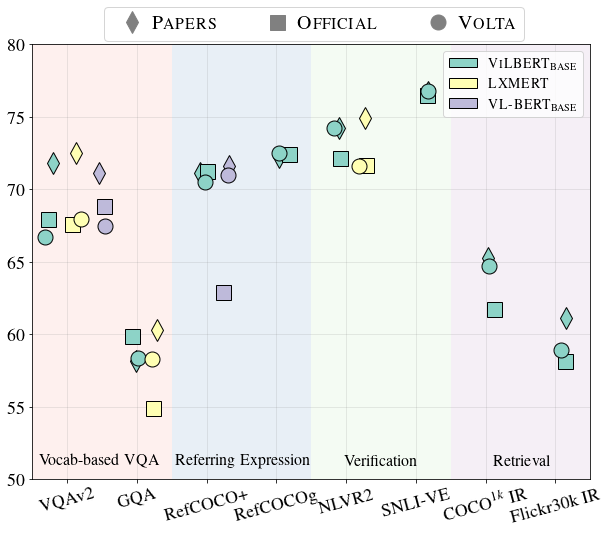

In [54]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

bcm = plt.get_cmap('Pastel1')
bcolors = bcm.colors
ax.set_xlim(-0.5, 7.5)
ax.axvspan(-0.5, 1.5, facecolor=bcolors[0], alpha=0.2)
ax.axvspan(1.5, 3.5, facecolor=bcolors[1], alpha=0.3)
ax.axvspan(3.5, 5.5, facecolor=bcolors[2], alpha=0.2)
ax.axvspan(5.5, 7.5, facecolor=bcolors[3], alpha=0.3)
ax.text(-0.4, 51, 'Vocab-based VQA', fontsize=16)
ax.text(1.55, 51, 'Referring Expression', fontsize=16)
ax.text(3.97, 51, 'Verification', fontsize=16)
ax.text(6.1, 51, 'Retrieval', fontsize=16)

w = 0.35
size=15
j = w/1.7
# VQA
i = 0
ax.plot(i-w + np.random.rand(1)[0]*j, list(paper2vqa.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(paper2vqa.values())[1], 'd', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i+w + np.random.rand(1)[0]*j, list(paper2vqa.values())[2], 'd', markersize=size, markeredgecolor='k', color=colors[2])
ax.plot(i-w + np.random.rand(1)[0]*j, list(official2vqa.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(official2vqa.values())[1], 's', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i+w + np.random.rand(1)[0]*j, list(official2vqa.values())[2], 's', markersize=size, markeredgecolor='k', color=colors[2])
ax.plot(i-w + np.random.rand(1)[0]*j, list(volta2vqa.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(volta2vqa.values())[1], 'o', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i+w + np.random.rand(1)[0]*j, list(volta2vqa.values())[2], 'o', markersize=size, markeredgecolor='k', color=colors[2])

# GQA
i = 1
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(paper2gqa.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(paper2gqa.values())[1], 'd', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(official2gqa.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(official2gqa.values())[1], 's', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(volta2gqa.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(volta2gqa.values())[1], 'o', markersize=size, markeredgecolor='k', color=colors[1])

# RefCOCO+
i = 2
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(paper2ref.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(paper2ref.values())[1], 'd', markersize=size, markeredgecolor='k', color=colors[2])
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(official2ref.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(official2ref.values())[1], 's', markersize=size, markeredgecolor='k', color=colors[2])
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(volta2ref.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(volta2ref.values())[1], 'o', markersize=size, markeredgecolor='k', color=colors[2])

# RefCOCO+
i = 3
ax.plot(i + np.random.rand(1)[0]*j, list(paper2reg.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(official2reg.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(volta2reg.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])

# NLVR
i = 4
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(paper2nlvr.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(paper2nlvr.values())[1], 'd', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(official2nlvr.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(official2nlvr.values())[1], 's', markersize=size, markeredgecolor='k', color=colors[1])
ax.plot(i-w/2 + np.random.rand(1)[0]*j, list(volta2nlvr.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i+w/2 + np.random.rand(1)[0]*j, list(volta2nlvr.values())[1], 'o', markersize=size, markeredgecolor='k', color=colors[1])

# SNLI-VE
i = 5
ax.plot(i + np.random.rand(1)[0]*j, list(paper2snli.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(official2snli.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(volta2snli.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])

# COCO
i = 6
ax.plot(i + np.random.rand(1)[0]*j, list(paper2coco.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(official2coco.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(volta2coco.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])

# Flickr30k
i = 7
ax.plot(i + np.random.rand(1)[0]*j, list(paper2flickr.values())[0], 'd', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(official2flickr.values())[0], 's', markersize=size, markeredgecolor='k', color=colors[0])
ax.plot(i + np.random.rand(1)[0]*j, list(volta2flickr.values())[0], 'o', markersize=size, markeredgecolor='k', color=colors[0])

ax.set_ylim(50, 80)
ax.set_xticks([x for x in range(len(tasks))])
ax.set_xticklabels(tasks, fontsize=18, rotation=15)
ax.tick_params(axis="y", labelsize=18)
ax.grid(color='gray', alpha=0.2)

ax.plot([], [], color='gray', marker='d', linestyle='None', markersize=size, label='\\textsc{Papers}')
ax.plot([], [], color='gray', marker='s', linestyle='None', markersize=size, label='\\textsc{Official}')
ax.plot([], [], color='gray', marker='o', linestyle='None', markersize=size, label='\\textsc{Volta}')
leg1 = ax.legend(ncol=3,scatterpoints=1, fontsize=20, loc='upper right', bbox_to_anchor=(0.9, 1.11), handletextpad=0)

h = [Patch(facecolor=colors[0], edgecolor='k', label='$\\mathrm{\\textsc{ViLBERT}_{BASE}}$'),
     Patch(facecolor=colors[1], edgecolor='k', label='$\\mathrm{\\textsc{LXMERT}}$'),
     Patch(facecolor=colors[2], edgecolor='k', label='$\\mathrm{\\textsc{VL-BERT}_{BASE}}$')]
leg2 = ax.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='upper right')
ax.add_artist(leg1)

plt.savefig('unifiedv3.pdf', bbox_inches='tight')